In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 780k/780k [00:00<00:00, 1.46MB/s]

Extracting files...
Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\harlfoxem\housesalesprediction\versions\1


In [2]:
import pandas as pd
import numpy as np

In [3]:
df3 = pd.read_csv(path+'\\kc_house_data.csv')
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


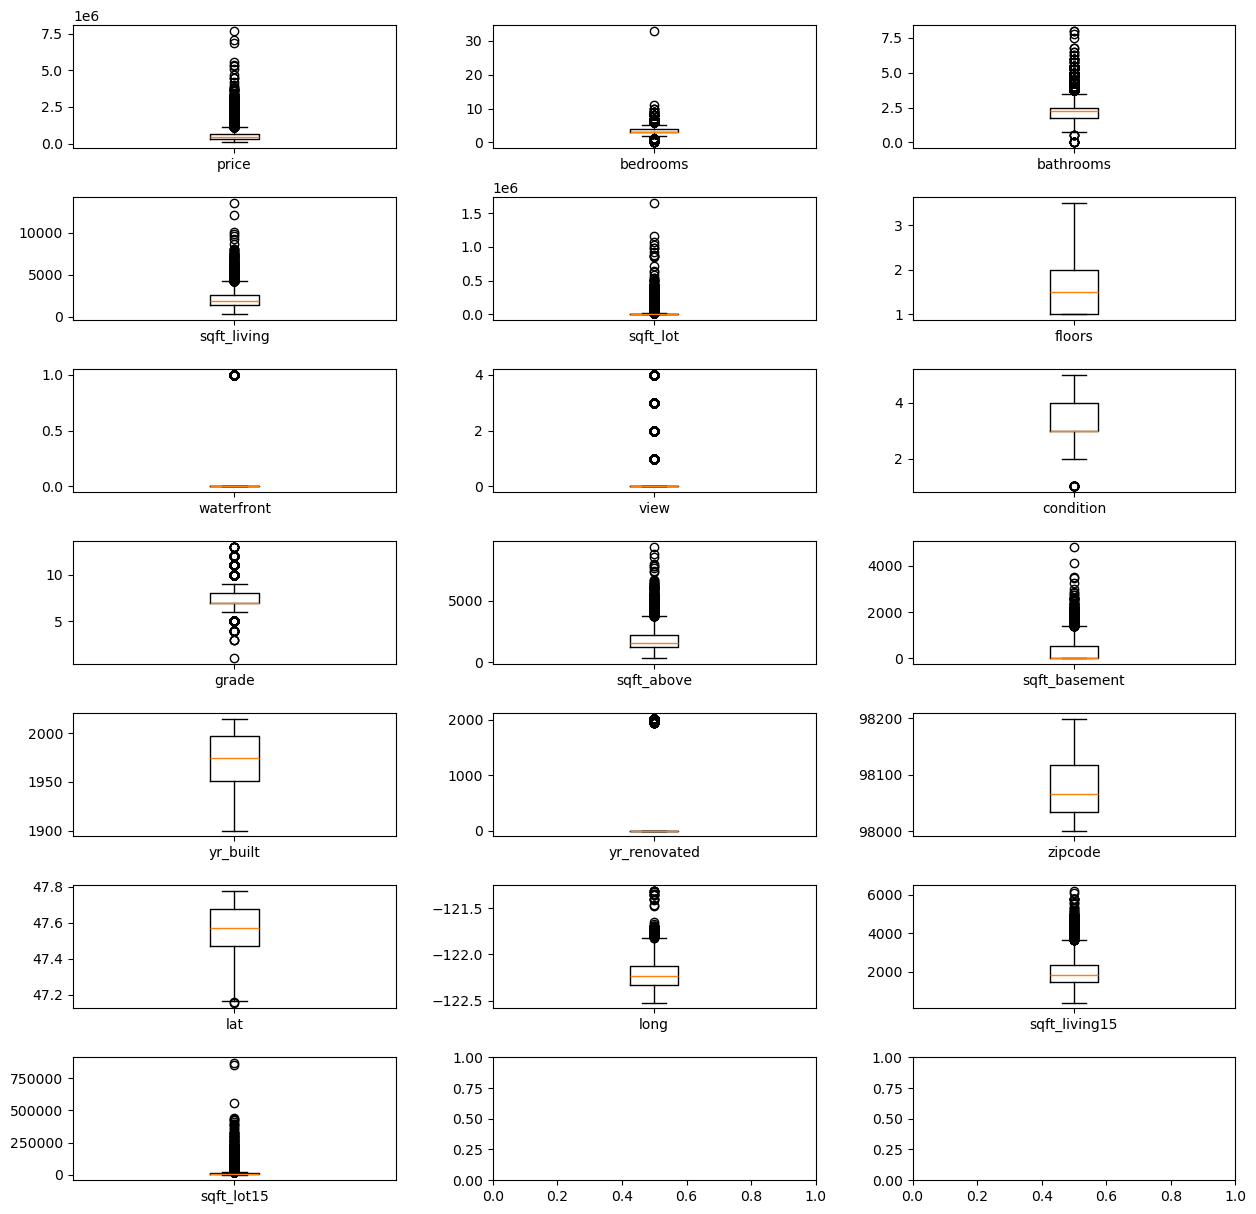

In [56]:
import matplotlib.pyplot as plt

labels = df3.columns.to_list()
labels.remove('date')
labels.remove('id')

fig, ax = plt.subplots(7, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.3) 

for i in range(19):
    ax[i // 3, i % 3].boxplot(df3.loc[:,[labels[i]]], tick_labels = [labels[i]])

plt.show()

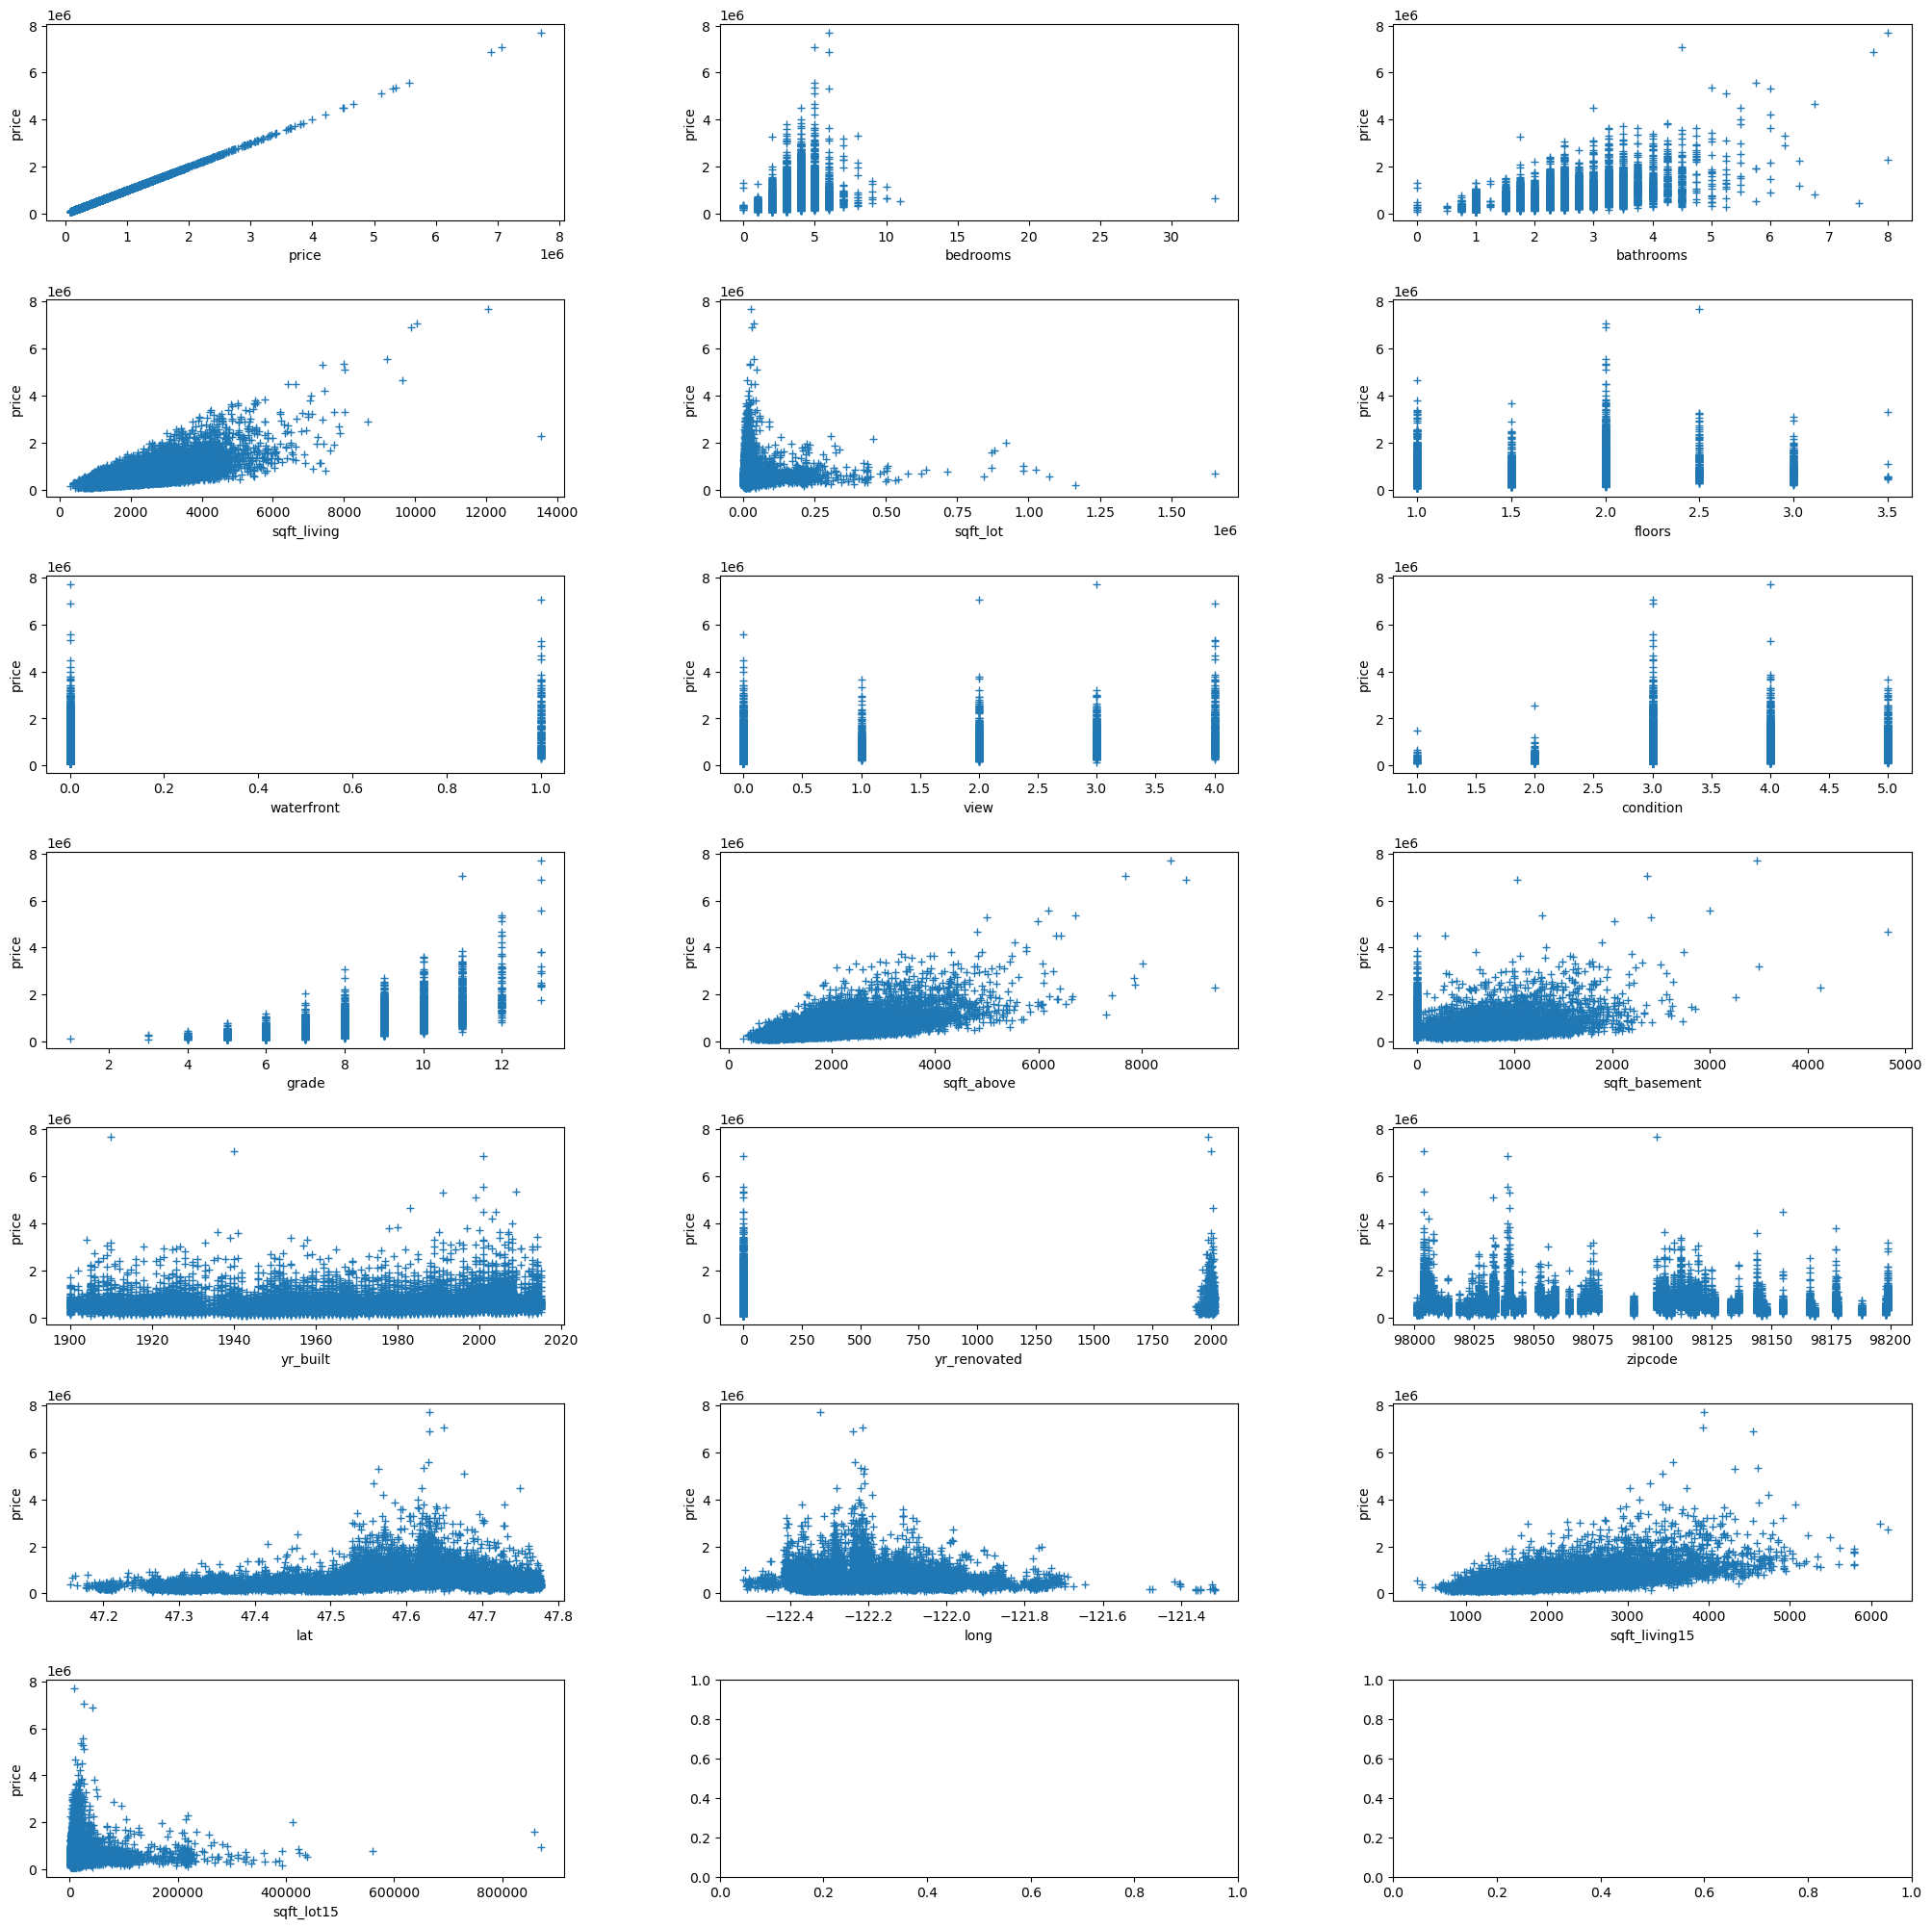

In [60]:
fig, ax = plt.subplots(7, 3, figsize=(25, 25))
fig.subplots_adjust(hspace=0.4, wspace=0.3) 

for i in range(19):
    ax[i // 3, i % 3].plot(df3.loc[:,[labels[i]]],df3.loc[:,[labels[0]]], '+')
    ax[i // 3, i % 3].set_ylabel('price')
    ax[i // 3, i % 3].set_xlabel(labels[i])

plt.show()

#если говорить про линейную зависимость, то лучше подойдут столбцы bathrooms, sqft_living, grade, sqft_above, yr_built, lat, sqft_living15

In [168]:
df3.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [287]:
#переходим к линейной регрессии для столбцов bathrooms, sqft_living, grade, sqft_above, lat, sqft_living15

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df3.loc[:,['bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'lat', 'view']].to_numpy()
y = df3.loc[:,['price']].to_numpy()

y /= 1000000

print('коробочное решение')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

reg = LinearRegression().fit(x_train, y_train)
r = reg.score(x_train, y_train)
print('метрика обучения: ', round(reg.score(x_train, y_train), 2))
coef = reg.coef_
#print('коэффициенты: ', list(map(lambda x: round(x, 2), coef[0])))
print('коэффициенты: ', coef[0])
b = reg.intercept_
print('коэффициент b: ', round(b[0], 2))
print('метрика теста: ', round(reg.score(x_test, y_test), 2))

коробочное решение
метрика обучения:  0.64
коэффициенты:  [-1.81989200e-02  1.84293853e-04  7.91440601e-02  3.40150055e-06
  6.71019201e-01  9.81724569e-02]
коэффициент b:  -32.35
метрика теста:  0.62


In [371]:
print('ручное решение')

w : list = [] #массив коэффициентов
for i in range(len(x_train[0])):
    w.append(0)
b = 0
error = 1

l_rate = 0.0001
max_num_steps = 1000
max_error = 0.01

summ : list = []
for j in range(len(x_train[0]) + 2):
    summ.append(0)
        
for i in range(max_num_steps):

    for j in range(len(x_train[0]) + 2):
        summ[j] = 0
        
    for j in range(len(x_train)):
        vir = 0
        for k in range(len(x_train[0])):
            vir += (w[k]*x_train[j][k])
        vir = vir + b - y_train[j]
        for k in range(len(x_train[0])):
            summ[k] += (vir * (x_train[j][k]))
        summ[len(x_train[0])] += vir
        summ[len(x_train[0]) + 1] += vir ** 2
    for j in range(len(x_train[0]) + 2):
        summ[j] /= len(x_train)
    #for j in range(len(x_train[0])):
     #   w[j] -= l_rate * summ[j]
    w[0] -= l_rate * summ[0]
    w[1] -= l_rate / 1000 * summ[1]
    w[2] -= l_rate * summ[2]
    w[3] -= l_rate / 1000 * summ[3]
    w[4] -= l_rate / 20 * summ[4]
    w[5] -= l_rate * summ[5]
    b -= l_rate * summ[len(x_train[0])]
    error = summ[len(x_train[0]) + 1]
    print('iter: ', i, 'error: ', error)
    if error < max_error:
        break

ручное решение
iter:  0 error:  [0.42409117]
iter:  1 error:  [0.07182303]
iter:  2 error:  [0.07103881]
iter:  3 error:  [0.07091182]
iter:  4 error:  [0.07079026]
iter:  5 error:  [0.07067278]
iter:  6 error:  [0.07055924]
iter:  7 error:  [0.07044951]
iter:  8 error:  [0.07034344]
iter:  9 error:  [0.07024093]
iter:  10 error:  [0.07014184]
iter:  11 error:  [0.07004606]
iter:  12 error:  [0.06995348]
iter:  13 error:  [0.06986398]
iter:  14 error:  [0.06977746]
iter:  15 error:  [0.06969381]
iter:  16 error:  [0.06961295]
iter:  17 error:  [0.06953477]
iter:  18 error:  [0.06945918]
iter:  19 error:  [0.06938609]
iter:  20 error:  [0.06931542]
iter:  21 error:  [0.06924708]
iter:  22 error:  [0.069181]
iter:  23 error:  [0.06911709]
iter:  24 error:  [0.06905528]
iter:  25 error:  [0.06899551]
iter:  26 error:  [0.06893769]
iter:  27 error:  [0.06888177]
iter:  28 error:  [0.06882768]
iter:  29 error:  [0.06877535]
iter:  30 error:  [0.06872473]
iter:  31 error:  [0.06867575]
iter:

In [372]:
print(w, b, error)

[array([-0.00039884]), array([0.00024039]), array([0.00176358]), array([4.87394863e-05]), array([-0.00140809]), array([0.00540541])] [-0.0006212] [0.06589776]


In [323]:
def r2(true, predict, ln) -> int:
    sred = 0
    num = 0
    for i in range(ln):
        sred += true[i]
        num += (true[i] - predict[i])**2
    sred /= ln
    det = 0
    for i in range(ln):
        det += (true[i] - sred)**2
    return (1 - (num / det) )        

In [324]:
def hand_fun(w, b, x) -> int:
    res = 0
    for i in range(len(w)):
        res += (x[i] * w[i])
    res += b
    return res

In [373]:
y_pred_train : list = []
y_pred_test : list = []
for i in range(len(x_train)):
    y_pred_train.append(hand_fun(w, b, x_train[i]))
for i in range(len(x_test)):
    y_pred_test.append(hand_fun(w, b, x_test[i]))

print('коробочное решение / ручное решение')
print('метрика обучения: ', round(reg.score(x_train, y_train), 2), '/', r2(y_train, y_pred_train, len(y_train)))
print('коэффициенты (коробка): ', coef[0])
print('коэффициенты (руки): ', w)
print('коэффициент b: ', round(reg.intercept_[0], 2), '/', b)
print('метрика теста: ', round(reg.score(x_test, y_test), 2), '/', r2(y_test, y_pred_test, len(y_test)))

коробочное решение / ручное решение
метрика обучения:  0.64 / [0.50658616]
коэффициенты (коробка):  [-1.81989200e-02  1.84293853e-04  7.91440601e-02  3.40150055e-06
  6.71019201e-01  9.81724569e-02]
коэффициенты (руки):  [array([-0.00039884]), array([0.00024039]), array([0.00176358]), array([4.87394863e-05]), array([-0.00140809]), array([0.00540541])]
коэффициент b:  -32.35 / [-0.0006212]
метрика теста:  0.62 / [0.48017407]
